In [ ]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

In [ ]:
from IPython.display import display

In [ ]:
import mglearn

In [ ]:
from sklearn.datasets import make_blobs

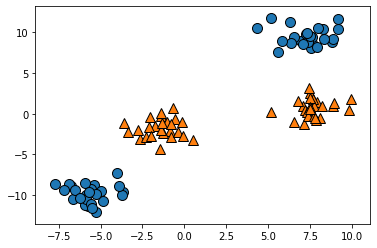

In [39]:
X,y = make_blobs(centers=4, random_state=8)
y = y%2
mglearn.discrete_scatter(X[:,0], X[:,1],y)

In [40]:
from sklearn.svm import LinearSVC
linear_svm = LinearSVC().fit(X,y)


c:\users\fire7\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


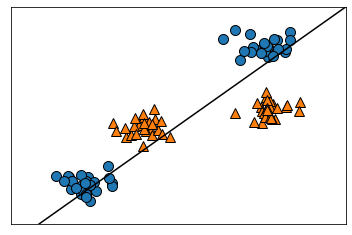

In [41]:
mglearn.plots.plot_2d_separator(linear_svm,X)
mglearn.discrete_scatter(X[:,0],X[:,1],y)

In [42]:
X_new = np.hstack([X,X[:,1:]**2])
from mpl_toolkits.mplot3d import Axes3D, axes3d

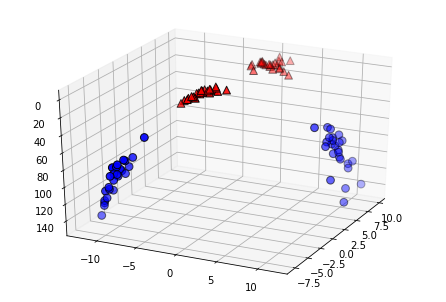

In [43]:
figure = plt.figure()
ax = Axes3D(figure, elev=-152, azim=-26)
mask=y==0
ax.scatter(X_new[mask,0],X_new[mask,1],X_new[mask,2], c='b',cmap = mglearn.cm2, s=60, edgecolor='k')
ax.scatter(X_new[~mask,0],X_new[~mask,1],X_new[~mask,2], c='r',marker = '^',cmap = mglearn.cm2, s=60, edgecolor='k')

c:\users\fire7\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


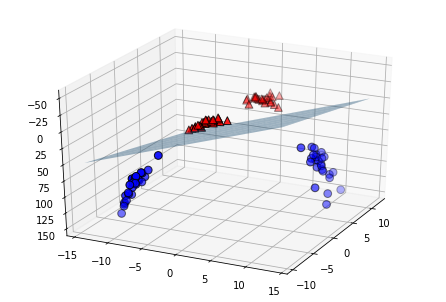

In [50]:
linear_svm_3d = LinearSVC().fit(X_new,y)
coef, intercept = linear_svm_3d.coef_.ravel(),linear_svm_3d.intercept_
figure= plt.figure()
ax = Axes3D(figure,elev=-152, azim=-26)
xx = np.linspace(X_new[:,0].min() - 2,X_new[:,0].max() +2, 50)
yy = np.linspace(X_new[:,1].min() - 2,X_new[:,1].max() +2, 50)

XX,YY = np.meshgrid(xx,yy)
ZZ = (coef[0]*XX+coef[1]*YY + intercept) / -coef[2]
ax.plot_surface(XX,YY,ZZ, rstride=8,cstride=8,alpha=0.4)
ax.scatter(X_new[mask,0],X_new[mask,1],X_new[mask,2],c='b',cmap=mglearn.cm2,s=60,edgecolor='k')
ax.scatter(X_new[~mask,0],X_new[~mask,1],X_new[~mask,2],c='r',marker='^',cmap=mglearn.cm2,s=60,edgecolor='k')


In [35]:
from sklearn.svm import SVC

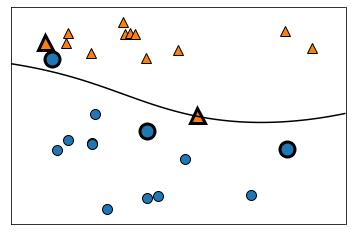

In [38]:
X,y = mglearn.tools.make_handcrafted_dataset()
svm = SVC(kernel='rbf', C=10, gamma=0.1).fit(X,y)
mglearn.plots.plot_2d_separator(svm,X,eps=0.5)

mglearn.discrete_scatter(X[:,0], X[:,1],y)

sv = svm.support_vectors_

sv_labels = svm.dual_coef_.ravel()>0
mglearn.discrete_scatter(sv[:,0],sv[:,1], sv_labels, s=15, markeredgewidth=3)

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [53]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)
svc = SVC()
svc.fit(X_train,y_train)
print('훈련 세트 정확도: {:.2f}'.format(svc.score(X_train, y_train)))
print('테스트 세트 정확도: {:.2f}'.format(svc.score(X_test, y_test)))

훈련 세트 정확도: 1.00
테스트 세트 정확도: 0.63


c:\users\fire7\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


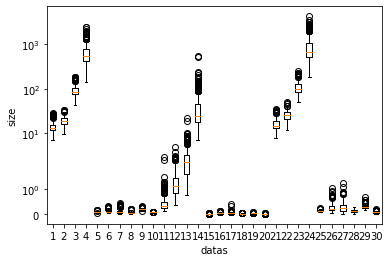

In [60]:
plt.boxplot(X_train)
plt.yscale('symlog')
plt.xlabel('datas')
plt.ylabel('size')
plt.show()

In [62]:
min_on_training = X_train.min(axis=0)
range_on_training = (X_train - min_on_training).max(axis=0)
X_train_scaled = (X_train - min_on_training)/ range_on_training
print('특성별 최솟값\n', X_train_scaled.min(axis=0))
print('특성별 최댓값\n', X_train_scaled.max(axis=0))

특성별 최솟값
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
특성별 최댓값
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


In [64]:
svc = SVC()
svc.fit(X_train_scaled,y_train)
print('훈련 세트 정확도: {:.2f}'.format(svc.score(X_train_scaled, y_train)))
print('테스트 세트 정확도: {:.2f}'.format(svc.score(X_test, y_test)))

훈련 세트 정확도: 0.95
테스트 세트 정확도: 0.63


c:\users\fire7\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


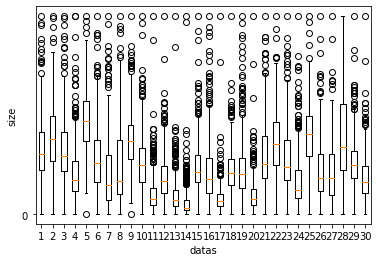

In [65]:
plt.boxplot(X_train_scaled)
plt.yscale('symlog')
plt.xlabel('datas')
plt.ylabel('size')
plt.show()

In [67]:
X_train

array([[1.185e+01, 1.746e+01, 7.554e+01, ..., 9.140e-02, 3.101e-01,
        7.007e-02],
       [1.122e+01, 1.986e+01, 7.194e+01, ..., 2.022e-02, 3.292e-01,
        6.522e-02],
       [2.013e+01, 2.825e+01, 1.312e+02, ..., 1.628e-01, 2.572e-01,
        6.637e-02],
       ...,
       [9.436e+00, 1.832e+01, 5.982e+01, ..., 5.052e-02, 2.454e-01,
        8.136e-02],
       [9.720e+00, 1.822e+01, 6.073e+01, ..., 0.000e+00, 1.909e-01,
        6.559e-02],
       [1.151e+01, 2.393e+01, 7.452e+01, ..., 9.653e-02, 2.112e-01,
        8.732e-02]])